<a href="https://colab.research.google.com/github/Nkbhapkar/-Demand-Prediction-for-Public-Transport/blob/main/capston_2_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing package

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset 

In [46]:
trans_df =pd.read_csv('/content/drive/MyDrive/Almabetter/Capston_1/train_revised.csv')

In [47]:
trans_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [48]:
trans_df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [49]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [50]:
trans_df.describe(include=object)

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,NNR1K0OLQS,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [51]:
#Check shape of dataset
trans_df.shape

(51645, 10)

In [52]:
trans_df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

This dataset consist 51645 observation and 10 column 

In [53]:
#Checking Null values in dataset 
trans_df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [54]:
#Checking unique seat number 
len(trans_df['seat_number'].unique())

61

# Summary about dataset


1.   This dataset contains 61 distinct seats.
2.   Travelers used two types of payment methods, with the majority of people using Mpesa to pay for their ticket.
3.   This dataset contains a record of 149 days out of a two-year period.
4.  There are two types of cars, the majority of which are buses.



# **EDA**

In [55]:
import warnings 
warnings.filterwarnings('ignore')

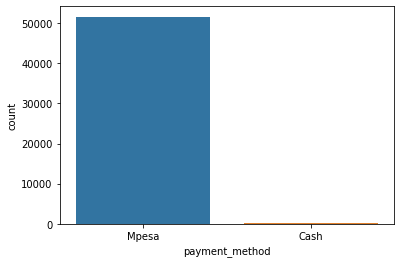

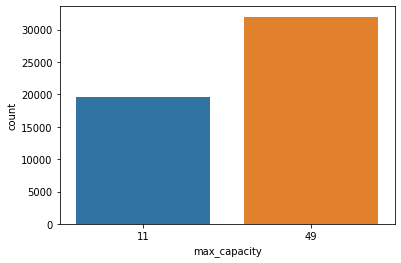

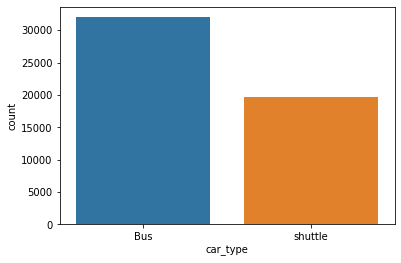

In [56]:
#plotting countplot for visualize the data 
plt_data = ['payment_method','max_capacity','car_type']
for plots in plt_data:
  sns.countplot(trans_df[plots])
  plt.show()

In [57]:
x2 = trans_df['travel_from'].value_counts().index
x2

Index(['Kisii', 'Migori', 'Homa Bay', 'Sirare', 'Rongo', 'Kehancha', 'Awendo',
       'Kijauri', 'Keroka', 'Nyachenge', 'Rodi', 'Mbita', 'Ndhiwa', 'Sori',
       'Keumbu', 'Oyugis', 'Kendu Bay'],
      dtype='object')

In [58]:
y2 = trans_df['travel_from'].value_counts()
y2

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

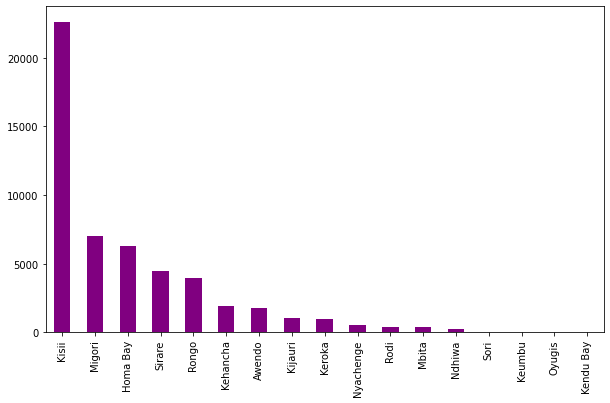

In [59]:
trans_df['travel_from'].value_counts().plot(kind='bar',color = 'purple',figsize=(10,6))
plt.show()

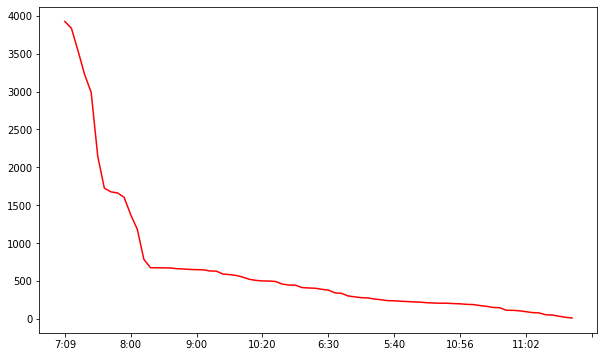

In [60]:
trans_df['travel_time'].value_counts().plot(kind='line',color="r",figsize=(10,6))
plt.show()

# Target variable 

In [61]:
mark = trans_df.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()

mark.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [62]:
#Seeing as our target variable has duplicate values, we must remove them.

In [63]:
trans_df = trans_df.drop_duplicates('ride_id')

In [64]:
trans_df.shape

(6249, 10)

In [65]:
#Drop unwanted columns 
trans_df =trans_df.drop(['seat_number',"payment_method",'payment_receipt'],axis=1)

In [66]:
#merge mark column into dataset 
trans_df = trans_df.merge(mark , how ="left" ,on= 'ride_id')

In [67]:
trans_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31


Remove constant feature also

In [68]:
# We have constat destination i.e Nairobi so drop these column 
trans_df = trans_df.drop('travel_to',axis=1)

In [71]:
trans_df['date']

0        17-10-17 7:15
1        19-11-17 7:12
2        26-11-17 7:05
3        27-11-17 7:10
4        27-11-17 7:12
             ...      
6244    20-04-18 23:10
6245     20-04-18 7:05
6246     20-04-18 7:09
6247     20-04-18 8:00
6248     14-11-17 5:10
Name: date, Length: 6249, dtype: object

In [82]:
trans_df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_month,day_of_year,year_week_of_year,hour,minute,weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,17,290,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,19,323,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,26,330,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,27,331,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,27,331,201748,7,12,0,2017,4,11


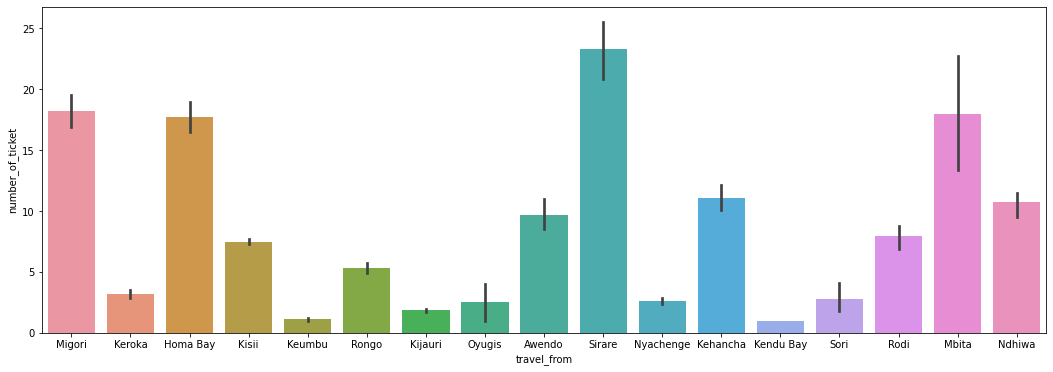

In [105]:
plt.figure(figsize=(18, 6))

sp = sns.barplot(x="travel_from", y="number_of_ticket",data=trans_df)

The majority of tickets are sold in Sirare and mbita from graph.

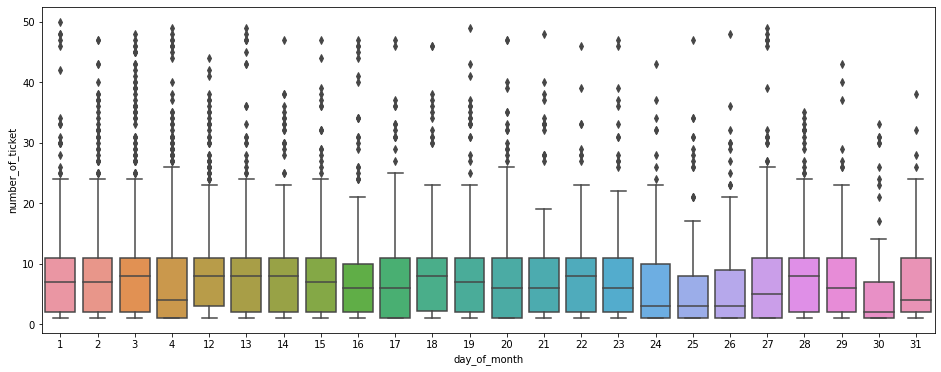

In [106]:
plt.figure(figsize=(16,6))
sns.boxplot(x='day_of_month', y="number_of_ticket", data=trans_df)

We can see that there is a gap between 5 and 11 on the month's day. We can assume that there is an official public transportation holiday between these dates. We can also say that the number of tickets sold on each day of the month is the same.

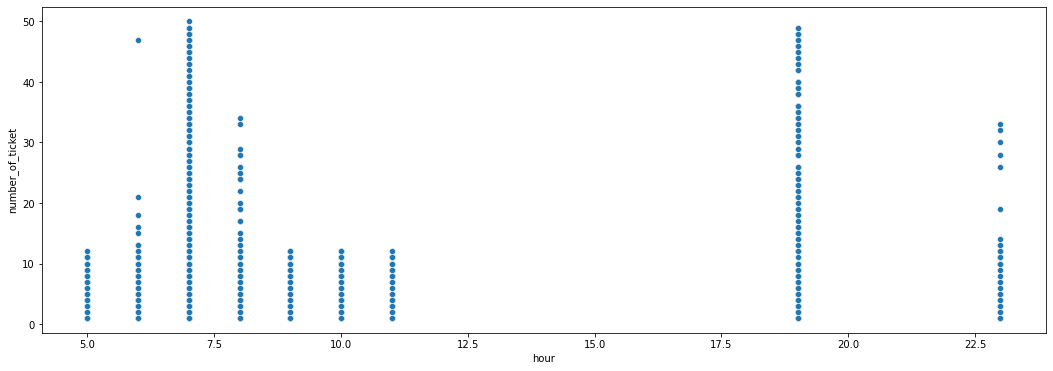

In [116]:

plt.figure(figsize=(18, 6))

sns.scatterplot(x='hour', y="number_of_ticket", data=trans_df)

We can see that the majority of the ticktes were sold between 7 a.m. and 8 p.m. That appears to be the case, as most people leave for work and the office in the morning.

We can conclude from the foregoing that there is no ride between 12 p.m. and 5.30 p.m.

# **Feature Engineering**

In [117]:
import datetime

In [118]:

#Concatinate tarvel date and travel time
trans_df["date"]=trans_df["travel_date"]+ " "+trans_df["travel_time"]

In [119]:
def time_feature(df):
  df['date'] = pd.to_datetime(df['date'])
  df['day_of_week'] = df['date'].dt.dayofweek
  df['day_of_month'] = df['date'].dt.day
  df['day_of_year'] = df['date'].dt.dayofyear
  df["year_week_of_year"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [120]:
trans_df_new = time_feature(trans_df)

In [121]:
trans_df_new

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_month,day_of_year,year_week_of_year,hour,minute,weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,17,290,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,19,323,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,26,330,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,27,331,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,27,331,201748,7,12,0,2017,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,20-04-18,23:10,Ndhiwa,Bus,49,11,2018-04-20 23:10:00,4,20,110,201816,23,10,0,2018,2,4
6245,13813,20-04-18,7:05,Ndhiwa,Bus,49,11,2018-04-20 07:05:00,4,20,110,201816,7,5,0,2018,2,4
6246,13825,20-04-18,7:09,Rongo,Bus,49,1,2018-04-20 07:09:00,4,20,110,201816,7,9,0,2018,2,4
6247,13826,20-04-18,8:00,Awendo,Bus,49,1,2018-04-20 08:00:00,4,20,110,201816,8,0,0,2018,2,4


In [125]:
trans_df_new["travel_time"] = trans_df_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [130]:
trans_df_new['period'] = np.nan

trans_df_new.loc[trans_df_new.travel_time < 7, 'period'] = 'em'
trans_df_new.loc[(trans_df_new.travel_time >= 7) & (trans_df_new.travel_time < 11), 'period'] = 'am'
trans_df_new.loc[(trans_df_new.travel_time >= 11) & (trans_df_new.travel_time < 15), 'period'] = 'mid'
trans_df_new.loc[(trans_df_new.travel_time >= 15) & (trans_df_new.travel_time < 19), 'period'] = 'eve'
trans_df_new.loc[(trans_df_new.travel_time >= 19) & (trans_df_new.travel_time <= 24), 'period'] = 'pm'

period_count = dict(trans_df_new['period'].value_counts())
period_count

trans_df_new['hourly_travelers'] = np.log1p(trans_df_new['period'].map(period_count))
dcount = dict(trans_df_new["day_of_year"].value_counts())
trans_df_new["daily_travelers"] = np.log1p(trans_df_new["day_of_year"].map(dcount))
trans_df_new.tail()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_month,day_of_year,year_week_of_year,hour,minute,weekend,year,quarter,month,period,hourly_travelers,daily_travelers
6244,13812,20-04-18,23.166667,Ndhiwa,Bus,49,11,2018-04-20 23:10:00,4,20,110,201816,23,10,0,2018,2,4,pm,5.659482,3.737670
6245,13813,20-04-18,7.083333,Ndhiwa,Bus,49,11,2018-04-20 07:05:00,4,20,110,201816,7,5,0,2018,2,4,am,8.494743,3.737670
6246,13825,20-04-18,7.150000,Rongo,Bus,49,1,2018-04-20 07:09:00,4,20,110,201816,7,9,0,2018,2,4,am,8.494743,3.737670
6247,13826,20-04-18,8.000000,Awendo,Bus,49,1,2018-04-20 08:00:00,4,20,110,201816,8,0,0,2018,2,4,am,8.494743,3.737670
6248,14304,14-11-17,5.166667,Kisii,Bus,49,1,2017-11-14 05:10:00,1,14,318,201746,5,10,0,2017,4,11,em,6.896694,0.693147


In [128]:
period_count

{'am': 4888, 'em': 988, 'mid': 87, 'pm': 286}

In [131]:
trans_df_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_month', 'day_of_year', 'year_week_of_year', 'hour', 'minute',
       'weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [133]:
new_columns =['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [134]:
new_df = trans_df_new.copy()

In [135]:
new_df

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_month,day_of_year,year_week_of_year,hour,minute,weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,17,290,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,19,323,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,26,330,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,27,331,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,27,331,201748,7,12,0,2017,4,11,am,8.494743,3.871201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,20-04-18,23.166667,Ndhiwa,Bus,49,11,2018-04-20 23:10:00,4,20,110,201816,23,10,0,2018,2,4,pm,5.659482,3.737670
6245,13813,20-04-18,7.083333,Ndhiwa,Bus,49,11,2018-04-20 07:05:00,4,20,110,201816,7,5,0,2018,2,4,am,8.494743,3.737670
6246,13825,20-04-18,7.150000,Rongo,Bus,49,1,2018-04-20 07:09:00,4,20,110,201816,7,9,0,2018,2,4,am,8.494743,3.737670
6247,13826,20-04-18,8.000000,Awendo,Bus,49,1,2018-04-20 08:00:00,4,20,110,201816,8,0,0,2018,2,4,am,8.494743,3.737670


In [136]:
#Checking shape of new dataset
new_df.shape

(6249, 21)

In [140]:
new_df.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [141]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
new_df['month'].replace(dict_cov,inplace=True)
  

In [142]:
new_df.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [143]:
new_df.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [144]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
new_df['day_of_month'].replace(conv_dict,inplace=True)

In [145]:
new_df['day_of_month'].value_counts()

1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [146]:
new_df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_month,day_of_year,year_week_of_year,hour,minute,weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,2,290,201742,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,2,323,201746,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,3,330,201747,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,3,331,201748,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,3,331,201748,7,12,0,2017,4,2,am,8.494743,3.871201


In [153]:
# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_betw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_betw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_betw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_betw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_betw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_betw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_betw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_betw_0_1_next_bus", "Time_gap_betw_0_1_previous_bus", "Time_gap_betw_0_2_next_bus","Time_gap_betw_0_2_previous_bus",
      "Time_gap_betw_0_3_next_bus", "Time_gap_betw_0_3_previous_bus",
      "Time_gap_betw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  
  return data

In [154]:
df = find_difference_bw_bus(new_df)

In [155]:
df.isnull().sum()

ride_id                            0
travel_date                        0
travel_time                        0
travel_from                        0
car_type                           0
max_capacity                       0
number_of_ticket                   0
date                               0
day_of_week                        0
day_of_month                       0
day_of_year                        0
year_week_of_year                  0
hour                               0
minute                             0
weekend                            0
year                               0
quarter                            0
month                              0
period                             0
hourly_travelers                   0
daily_travelers                    0
Time_gap_betw_0_1_next_bus         1
Time_gap_betw_0_1_previous_bus     1
Time_gap_betw_0_2_next_bus         3
Time_gap_betw_0_2_previous_bus     3
Time_gap_betw_0_3_next_bus         3
Time_gap_betw_0_3_previous_bus     3
T

In [156]:
df.dropna(inplace=True)

In [157]:
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_month,day_of_year,year_week_of_year,hour,minute,weekend,year,quarter,month,period,hourly_travelers,daily_travelers,Time_gap_betw_0_1_next_bus,Time_gap_betw_0_1_previous_bus,Time_gap_betw_0_2_next_bus,Time_gap_betw_0_2_previous_bus,Time_gap_betw_0_3_next_bus,Time_gap_betw_0_3_previous_bus,Time_gap_betw_next_previous_bus
502,6654,05-12-17,7.133333,Awendo,Bus,49,2,2017-05-12 07:08:00,4,1,132,201719,7,8,0,2017,2,3,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
5530,12926,01-04-18,7.133333,Awendo,Bus,49,20,2018-01-04 07:08:00,3,1,4,20181,7,8,0,2018,1,1,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
5533,12929,01-04-18,7.200000,Awendo,Bus,49,2,2018-01-04 07:12:00,3,1,4,20181,7,12,0,2018,1,1,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
5539,12935,01-04-18,7.216667,Awendo,Bus,49,9,2018-01-04 07:13:00,3,1,4,20181,7,13,0,2018,1,1,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
5528,12924,01-04-18,8.000000,Awendo,Bus,49,15,2018-01-04 08:00:00,3,1,4,20181,8,0,0,2018,1,1,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


In [158]:
from sklearn import preprocessing #Import LabelEncoder
df = pd.get_dummies(df, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
df.replace(label_enc,inplace=True)

In [162]:

keys= ["ride_id"]
Target_name="number_of_ticket"
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_week_of_year','max_capacity','number_of_ticket',
               'period'
]


In [163]:
features = df.drop(not_used_cols,axis=1).columns

In [164]:
features

Index(['car_type', 'day_of_week', 'day_of_year', 'hour', 'minute', 'weekend',
       'year', 'quarter', 'hourly_travelers', 'daily_travelers',
       'Time_gap_betw_0_1_next_bus', 'Time_gap_betw_0_1_previous_bus',
       'Time_gap_betw_0_2_next_bus', 'Time_gap_betw_0_2_previous_bus',
       'Time_gap_betw_0_3_next_bus', 'Time_gap_betw_0_3_previous_bus',
       'Time_gap_betw_next_previous_bus', 'travel_from_Awendo',
       'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Keroka',
       'travel_from_Keumbu', 'travel_from_Kijauri', 'travel_from_Kisii',
       'travel_from_Mbita', 'travel_from_Migori', 'travel_from_Ndhiwa',
       'travel_from_Nyachenge', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'day_of_month_1',
       'day_of_month_2', 'day_of_month_3', 'month_1', 'month_2', 'month_3'],
      dtype='object')

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [167]:
df[features].head()

,car_type,day_of_week,day_of_year,hour,minute,weekend,year,quarter,hourly_travelers,daily_travelers,Time_gap_betw_0_1_next_bus,Time_gap_betw_0_1_previous_bus,Time_gap_betw_0_2_next_bus,Time_gap_betw_0_2_previous_bus,Time_gap_betw_0_3_next_bus,Time_gap_betw_0_3_previous_bus,Time_gap_betw_next_previous_bus,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,1,4,132,7,8,0,2017,2,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5530,1,3,4,7,8,0,2018,1,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5533,1,3,4,7,12,0,2018,1,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5539,1,3,4,7,13,0,2018,1,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5528,1,3,4,8,0,0,2018,1,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
